In [1]:
!pip install geopandas
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from matplotlib.colors import ListedColormap
import numpy as np

In [2]:
zipcodes = gpd.read_file(r'C:\Users\91983\Documents\NSS\python\projects\geospatial-jamilamadda\data\zipcodes.geojson')
print(zipcodes.crs)

EPSG:4326


In [3]:
trash=pd.read_csv(r'C:\Users\91983\Documents\NSS\python\projects\trash-haulers-the-incredibles\data\trash.csv')
trash=trash.drop(columns=['requestno','description'])

In [4]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
trash_geo = gpd.GeoDataFrame(trash, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(trash.lng,trash.lat))

In [6]:
trash_geo.head(2)

,dateopened,address,zip,company,trashroute,district,lng,lat,request,geometry
0,2017-11-01,4028 Clarksville Pike,37218,RED RIVER,4202,1.0,-86.838103,36.213470,Trash - Curbside/Alley Missed Pickup,POINT (-86.83810 36.21347)
1,2017-11-01,6528 Thunderbird Dr,37209,RED RIVER,4205,20.0,-86.885562,36.142923,Trash - Curbside/Alley Missed Pickup,POINT (-86.88556 36.14292)


In [7]:
type(trash_geo)

geopandas.geodataframe.GeoDataFrame

In [8]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [9]:
trashandzip = gpd.sjoin(trash_geo,zipcodes, predicate = 'within')

In [10]:
type(trashandzip)

geopandas.geodataframe.GeoDataFrame

In [11]:
trashandzip=trashandzip.reset_index(drop=True)
type(trashandzip)
trashandzip=trashandzip.drop(columns=['zip_left'])
trashandzip.head(2)

,dateopened,address,company,trashroute,district,lng,lat,request,geometry,index_right,zip_right,po_name
0,2017-11-01,4028 Clarksville Pike,RED RIVER,4202,1.0,-86.838103,36.213470,Trash - Curbside/Alley Missed Pickup,POINT (-86.83810 36.21347),27,37218,NASHVILLE
1,2017-11-01,6528 Thunderbird Dr,RED RIVER,4205,20.0,-86.885562,36.142923,Trash - Curbside/Alley Missed Pickup,POINT (-86.88556 36.14292),12,37209,NASHVILLE


In [12]:
type(trashandzip)

geopandas.geodataframe.GeoDataFrame

In [13]:
missed_trash=trashandzip[trashandzip['request']=='Trash - Curbside/Alley Missed Pickup']
type(missed_trash)


geopandas.geodataframe.GeoDataFrame

In [13]:
redriver =missed_trash.loc[missed_trash['company'] == 'RED RIVER']
metro=missed_trash.loc[missed_trash['company'] == 'METRO']
wasteind=missed_trash.loc[missed_trash['company'] == 'WASTE IND']

In [14]:
redriver_address=pd.DataFrame(redriver['address'].value_counts()).reset_index()
redriver_address_10=redriver_address[redriver_address['count']>10]
redriver_address_10


,address,count
0,"12546 Old Hickory Blvd, Nashville, TN 37013, U...",19
1,"6007 Obrien Ave, Nashville, TN 37209, United S...",18
2,5135 Hickory Hollow Pkwy,18
3,"802 Crescent Rd, Nashville, TN 37205, United S...",17
4,3710 N NATCHEZ CT,17
5,"607 Estes Rd, Nashville, TN 37215, United States",15
6,617 kinsey blvd,13
7,"116 Margaret St, Nashville, TN 37115, United S...",13
8,"320 Old Hickory Blvd, Nashville, TN 37221, Uni...",12
9,"209 Page Rd, Nashville, TN 37205, United States",11


In [15]:
metro_address=pd.DataFrame(metro['address'].value_counts()).reset_index()
metro_address_5=metro_address[metro_address['count']>5]


In [16]:
wasteind_address=pd.DataFrame(wasteind['address'].value_counts()).reset_index()
wasteind_address_2=wasteind_address[wasteind_address['count']>2]


In [19]:
missed_trash['po_name'].value_counts()

po_name
NASHVILLE       15054
ANTIOCH          2160
MADISON          1146
BRENTWOOD         151
WHITES CREEK       57
HERMITAGE           4
LA VERGNE           3
OLD HICKORY         3
Name: count, dtype: int64

In [48]:
missed_trash['zip_right'].value_counts()

zip_right
37013    2160
37211    2077
37205    1354
37215    1338
37209    1282
37207    1156
37115    1146
37206    1117
37208     950
37214     935
37218     916
37217     772
37216     761
37204     599
37212     526
37210     504
37203     369
37220     279
37027     151
37189      57
37221      48
37219      36
37201      33
37076       4
37086       3
37138       3
37213       1
37228       1
Name: count, dtype: int64

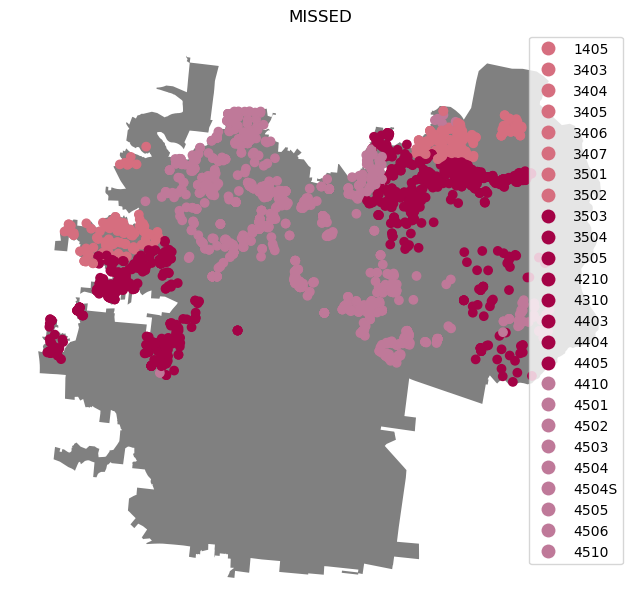

In [84]:
misses_in_antioch = missed_trash.loc[missed_trash['zip_right'] == '37013']
polygonantioch = zipcodes.loc[zipcodes['zip'] == '37013']
ax = polygonantioch.plot(figsize = (8, 8), color = 'grey')
misses_in_antioch.plot( ax = ax, column = 'trashroute',legend=True,cmap=custom_cmap)
ax.axis('off')
plt.title('MISSED')
plt.show();

In [98]:
misses_in_antioch=misses_in_antioch[misses_in_antioch['trashroute']=='3503']
misses_in_antioch

,dateopened,address,company,trashroute,district,lng,lat,request,geometry,index_right,zip_right,po_name
130,2017-11-06,1416 Forrestal Way,RED RIVER,3503,33.0,-86.599426,36.069875,Trash - Curbside/Alley Missed Pickup,POINT (-86.59943 36.06987),51,37013,ANTIOCH
192,2017-11-12,3288 New Towne rd,RED RIVER,3503,33.0,-86.604779,36.071940,Trash - Curbside/Alley Missed Pickup,POINT (-86.60478 36.07194),51,37013,ANTIOCH
303,2017-11-20,3401 Country Way Rd,RED RIVER,3503,33.0,-86.602031,36.074749,Trash - Curbside/Alley Missed Pickup,POINT (-86.60203 36.07475),51,37013,ANTIOCH
358,2017-11-27,3604 green garden ct,RED RIVER,3503,33.0,-86.600025,36.072085,Trash - Curbside/Alley Missed Pickup,POINT (-86.60002 36.07209),51,37013,ANTIOCH
535,2017-12-08,3436 Towne Village Rd,RED RIVER,3503,33.0,-86.599604,36.074950,Trash - Curbside/Alley Missed Pickup,POINT (-86.59960 36.07495),51,37013,ANTIOCH
...,...,...,...,...,...,...,...,...,...,...,...,...
16723,2019-09-17,"5012 Arrogate Dr, Nashville, TN 37013, United ...",RED RIVER,3503,33.0,-86.612936,36.061438,Trash - Curbside/Alley Missed Pickup,POINT (-86.61294 36.06144),51,37013,ANTIOCH
16888,2019-09-20,"5953 Mt View Rd, Antioch, Tennessee, 37013",RED RIVER,3503,33.0,-86.616927,36.059418,Trash - Curbside/Alley Missed Pickup,POINT (-86.61693 36.05942),51,37013,ANTIOCH
17128,2019-09-28,"2012 Leatherbury Ct, Nashville, TN 37013, Unit...",RED RIVER,3503,33.0,-86.592144,36.071613,Trash - Curbside/Alley Missed Pickup,POINT (-86.59214 36.07161),51,37013,ANTIOCH
17144,2019-09-30,"2028 Leatherbury Ct, Nashville, TN 37013, Unit...",RED RIVER,3503,33.0,-86.592873,36.071957,Trash - Curbside/Alley Missed Pickup,POINT (-86.59287 36.07196),51,37013,ANTIOCH


In [99]:
center=polygonantioch.geometry.centroid

C:\Users\91983\AppData\Local\Temp\ipykernel_29740\1391930708.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center=polygonantioch.geometry.centroid


In [100]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[51    36.041767
dtype: float64, 51   -86.636359
dtype: float64]


In [101]:

map_37013 = folium.Map(location =  area_center, zoom_start = 12)
map_37013

C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


In [102]:
i = 0
for row_index, row_values in misses_in_antioch.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 130
values are:
 
dateopened                                       2017-11-06
address                                  1416 Forrestal Way
company                                           RED RIVER
trashroute                                             3503
district                                               33.0
lng                                              -86.599426
lat                                               36.069875
request                Trash - Curbside/Alley Missed Pickup
geometry       POINT (-86.59942576487312 36.06987474340685)
index_right                                              51
zip_right                                             37013
po_name                                             ANTIOCH
Name: 130, dtype: object
------------------------- 
index is 192
values are:
 
dateopened                                       2017-11-12
address                                   3288 New Towne rd
company                                           RED 

In [105]:
#draw our zip code area: 37207
map_37013 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygonantioch).add_to(map_37013)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in misses_in_antioch.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['address'])
    icon=folium.Icon(color="pink",icon="trash-o", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37013)

map_37013.save(r'C:\Users\91983\Documents\NSS\python\projects\trash-haulers-the-incredibles\map\map37013.html')
#display our map
map_37013

C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
C:\Users\91983\anaconda3\envs\geospatial\lib\site-packages\folium\utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


In [104]:
polygonnash = zipcodes.loc[zipcodes['po_name'] == 'NASHVILLE']


(-87.07811259380816, -86.56634585385885, 35.98393724957945, 36.30769246869755)

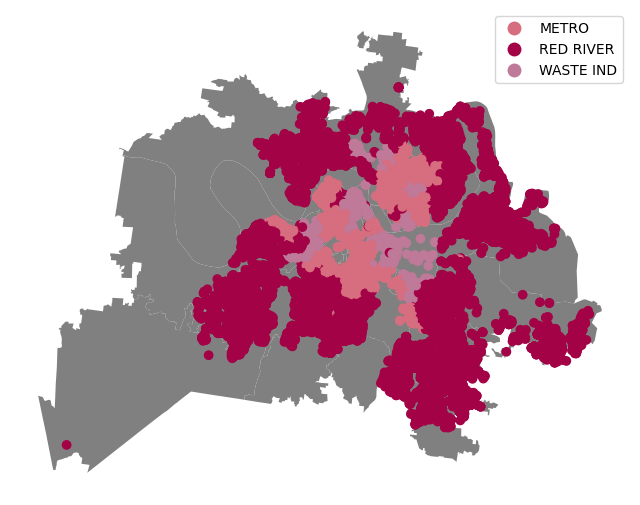

In [106]:
misses = missed_trash.loc[missed_trash['po_name'] == 'NASHVILLE']
polygon = zipcodes.loc[zipcodes['po_name'] == 'NASHVILLE']
import matplotlib.patches as mpatches

legend_handles = [
    mpatches.Patch(color=custom_colors[0], label='RED RIVER'),
    mpatches.Patch(color=custom_colors[1], label='METRO'),
    mpatches.Patch(color=custom_colors[2], label='WASTE INDUSTRIES'),
    mpatches.Patch(color=custom_colors[3], label='OTHER')
]
custom_colors = ['#d66e7f', '#a40246', '#bf7999']
custom_cmap = ListedColormap(custom_colors)
ax = polygon.plot(figsize=(8, 8), color='grey')
misses.plot(
    ax=ax, 
    column='company',
    legend=True,
    cmap=custom_cmap)
ax.axis('off')

#d66e7f', '#a40246', '#bf7999', '#AAAAAA

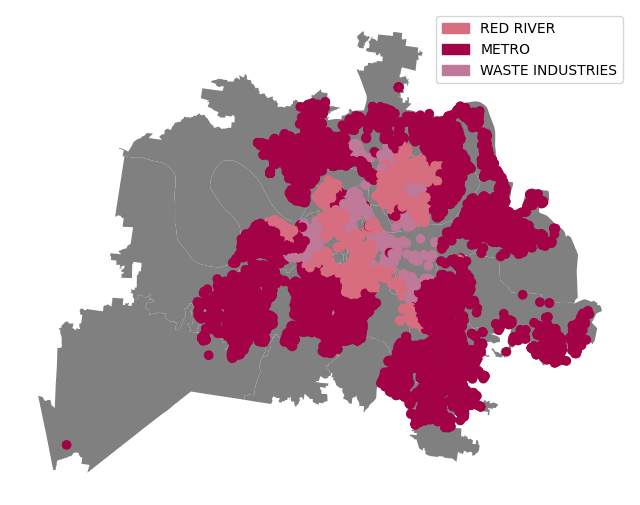

In [109]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Assume 'missed_trash' and 'zipcodes' DataFrames are already defined
misses = missed_trash.loc[missed_trash['po_name'] == 'NASHVILLE']
polygon = zipcodes.loc[zipcodes['po_name'] == 'NASHVILLE']

# Define custom colors FIRST
custom_colors = ['#d66e7f', '#a40246', '#bf7999'] 
custom_cmap = ListedColormap(custom_colors)

# Define legend handles explicitly, using indexes to get specific colors
legend_handles = [
    mpatches.Patch(color=custom_colors[0], label='RED RIVER'),
    mpatches.Patch(color=custom_colors[1], label='METRO'),
    mpatches.Patch(color=custom_colors[2], label='WASTE INDUSTRIES'),
    # You are missing a color for 'OTHER'. If you only have 3 colors defined, 
    # you might want to remove 'OTHER' or add a 4th color to custom_colors.
    # mpatches.Patch(color='#CCCCCC', label='OTHER') # Example of adding a 4th color
]

# Create the base plot
ax = polygon.plot(figsize=(8, 8), color='grey')
misses.plot(
    ax=ax, 
    column='company',
    legend=False, # Set legend=False to use the custom handles
    cmap=custom_cmap)

ax.axis('off')

# Add the custom legend handles using ax.legend()
ax.legend(handles=legend_handles, loc='best')

# Optional: if running in a script, use plt.show() to display the plot
# plt.show()


custom_colors = ['#d66e7f', '#a40246', '#bf7999']
custom_cmap = ListedColormap(custom_colors)
leg_kwds = { 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03)}
ax = zipcodes.plot(figsize=(8, 8), color='grey')
missed_trash.plot(
    ax=ax, 
    column='company',
    legend=True, legend_kwds = leg_kwds,
    cmap=custom_cmap)
ax.axis('off')
plt.title('MISSED TRASH PICKUPS BY COMPANY')


custom_colors = ['#d66e7f', '#a40246', '#bf7999']
custom_cmap = ListedColormap(custom_colors)
leg_kwds = {
    'loc': 'upper left',
    'bbox_to_anchor': (0.7, 1.00),
    'prop': {'size': 30} # Controls the font size of the legend text
}
ax = zipcodes.plot(figsize=(8, 8), color='grey')
missed_trash.plot(
    ax=ax,
    column='company',
    legend=True, 
    legend_kwds=leg_kwds,
    cmap=custom_cmap)
ax.axis('off')


misses = missed_trash.loc[missed_trash['po_name'] == 'ANTIOCH']
polygon = zipcodes.loc[zipcodes['po_name'] == 'ANTIOCH']
custom_colors = [ '#d66e7f']
custom_cmap = ListedColormap(custom_colors)
ax = polygon.plot(figsize=(8, 8), color='grey')
misses.plot(
    ax=ax, 
    column='company',
    cmap=custom_cmap)
ax.axis('off')

misses = missed_trash.loc[missed_trash['po_name'] == 'MADISON']
polygon = zipcodes.loc[zipcodes['po_name'] == 'MADISON']
custom_colors = ['#d66e7f']
custom_cmap = ListedColormap(custom_colors)
ax = polygon.plot(figsize=(8, 8), color='grey')
misses.plot(
    ax=ax, 
    column='company',
    cmap=custom_cmap)
ax.axis('off')

misses = missed_trash.loc[missed_trash['po_name'] == 'BRENTWOOD']
polygon = zipcodes.loc[zipcodes['po_name'] == 'BRENTWOOD']
custom_colors = ['#d66e7f', '#a40246', '#bf7999']
custom_cmap = ListedColormap(custom_colors)
ax = polygon.plot(figsize=(8, 8), color='grey')
misses.plot(
    ax=ax, 
    column='company',
    cmap=custom_cmap)
ax.axis('off')